In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
def CVD_Stim (img, CVD_type):
	img = np.array(img)
	sizeImg = img.shape 
	if(len(sizeImg)==3):
	    imgHeight = sizeImg[0]
	    imgWidth  = sizeImg[1]
	    imgB = img[:,:,0]
	    imgG = img[:,:,1]
	    imgR = img[:,:,2]
	else:
	    imgHeight = 1
	    imgWidth  = sizeImg[0]
	    imgB = img[:,0]
	    imgG = img[:,1]
	    imgR = img[:,2]
	GAMMA  = 2.2
	imgRGBVec = np.concatenate(([imgR.flatten()], [imgG.flatten()], [imgB.flatten()]), axis = 0)
	imgRGBVec = np.power(imgRGBVec, GAMMA)

	rgb2lms = [[17.8824, 43.5161, 4.11935],[3.45565, 27.1554, 3.86714], [0.0299566, 0.184309, 1.46709]]
	lms2rgb = [[0.0809, -0.1305, 0.1167], [-0.0102, 0.0540, -0.1136], [-0.0004, -0.0041, 0.6935]]
	imgLMSVec = np.mat(rgb2lms) * np.mat(imgRGBVec)

	T = []
	if CVD_type == "Protanopia":
		T = [[0, 2.02344, -2.52581], [0, 1, 0] ,[0, 0, 1]] 
	elif CVD_type == "Deuteranope":
		T = [[1, 0, 0], [0.494207, 0, 1.24827], [0, 0, 1]]
	else:
		T = [[1, 0, 0], [0, 1, 0], [-0.395913, 0.801109, 0]]

	imgSimLMS = T * imgLMSVec
	imgSimRGBVec = lms2rgb*imgSimLMS

	imgSimR = imgSimRGBVec[0,:]
	imgSimG = imgSimRGBVec[1,:]
	imgSimB = imgSimRGBVec[2,:]

	imgSimR = np.array(imgSimR, dtype = np.complex)
	imgSimG = np.array(imgSimG, dtype = np.complex)
	imgSimB = np.array(imgSimB, dtype = np.complex)


	imgSimR = np.real(np.power(imgSimR, 1/GAMMA))
	imgSimG = np.real(np.power(imgSimG, 1/GAMMA))
	imgSimB = np.real(np.power(imgSimB, 1/GAMMA))

	imgSimR = np.reshape(imgSimR, [imgHeight, imgWidth])
	imgSimG = np.reshape(imgSimG, [imgHeight, imgWidth])
	imgSimB = np.reshape(imgSimB, [imgHeight, imgWidth])

	imgSim =  cv2.merge((imgSimB,imgSimG,imgSimR))
	return imgSim

In [3]:
import cv2
import numpy as np
import os
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape
import copy 
import tensorflow as tf
import tensorflow
from tensorflow.keras.utils import plot_model

from PIL import Image, ImageFilter

image_Size = 200




In [10]:
X = []
Y = []
fileName = []

dirPath = "/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Imgs"
count = 0
for file in os.listdir(dirPath):
    if file.endswith(".jpg"):
      count+=1
      image = np.array(cv2.resize(cv2.imread(dirPath + "/" + file), (image_Size, image_Size)))
      # X.append(image)
      # Y.append(np.uint8(CVD_Stim(image, "Protanopia"))) 
      X.append(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
      Y.append(cv2.cvtColor(np.uint8(CVD_Stim(image, "Protanopia")), cv2.COLOR_BGR2LAB)) 
      fileName.append(file)
      if(count%500 == 0):
        cv2_imshow(np.uint8(X[count - 1]))
        cv2_imshow(np.uint8(Y[count - 1]))
        # cv2_imshow(np.uint8(cv2.cvtColor(X[count - 1], cv2.COLOR_LAB2BGR)))
        # cv2_imshow(np.uint8(cv2.cvtColor(Y[count - 1], cv2.COLOR_LAB2BGR)))
        print(count)
      if(count > 25):
        break

print(count)
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.1, random_state = 0)
X = np.array(X)
Y = np.array(Y)




26


In [ ]:
import gc
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.1, random_state = 0)


# X = []
# Y = []
# gc.collect()


In [ ]:


model = Sequential()

#1st convolution layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_Size,image_Size,3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#2nd convolution layer
model.add(Conv2D(16,(3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(8,(3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(4,(3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(3,(3, 3), padding='same'))
model.add(Activation('sigmoid'))

# model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# model.add(Conv2D(1,(3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# model.add(Flatten())
# model.add(Dense(64))


#-------------------------
# model.add(Dense(625))
# model.add(Reshape((25, 25, 1)))

# model.add(Conv2D(1,(3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(UpSampling2D((2, 2)))

#3rd convolution layer
# model.add(Conv2D(2,(3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(UpSampling2D((2, 2)))

# model.add(Conv2D(8,(3, 3), padding='same'))
# model.add(Activation('relu'))

# #4rd convolution layer
# model.add(Conv2D(16,(3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(UpSampling2D((2, 2)))

# #-------------------------

# model.add(Conv2D(3,(3, 3), padding='same'))
# model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()
print(Xtrain.shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 16)      4624      
_________________________________________________________________
activation_1 (Activation)    (None, 200, 200, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 8)       1160      
_________________________________________________________________
activation_2 (Activation)    (None, 200, 200, 8)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 200, 200, 4)       2

In [ ]:
model.fit(Xtrain/255, Ytrain/255,
                epochs=15,
                batch_size=16,
                shuffle=True,
                validation_data=(Xtest/255, Ytest/255))

Epoch 1/15
225/225 [==============================] - 226s 1s/step - loss: 0.0103 - val_loss: 0.0031
Epoch 2/15
225/225 [==============================] - 229s 1s/step - loss: 0.0020 - val_loss: 9.4526e-04
Epoch 3/15
225/225 [==============================] - 226s 1s/step - loss: 7.7037e-04 - val_loss: 6.3655e-04
Epoch 4/15
225/225 [==============================] - 225s 1000ms/step - loss: 5.8591e-04 - val_loss: 5.1316e-04
Epoch 5/15
225/225 [==============================] - 227s 1s/step - loss: 5.0844e-04 - val_loss: 4.5927e-04
Epoch 6/15
225/225 [==============================] - 223s 990ms/step - loss: 4.2537e-04 - val_loss: 3.7941e-04
Epoch 7/15
225/225 [==============================] - 225s 1s/step - loss: 3.7997e-04 - val_loss: 3.4715e-04
Epoch 8/15
225/225 [==============================] - 227s 1s/step - loss: 3.3933e-04 - val_loss: 3.0236e-04
Epoch 9/15
225/225 [==============================] - 226s 1s/step - loss: 2.9521e-04 - val_loss: 2.4709e-04
Epoch 10/15
225/225 [===

In [ ]:
#Saving output images and/or model in Gdrive, commented for safety


# index = 0
# for file in fileName:
#   inImg = X[index]/255
#   image = np.uint8(model.predict(np.array([inImg]))[0]*255)
#   cv2.imwrite("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Imgs_2_2/" + file, image)
#   index+=1

# print(index)

# dirPath = "/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/model_4200Images_Epochs15_LAB.h5"
# model.save(dirPath)


In [6]:
# del model
from keras.models import load_model
dirPath = "/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/model_4200Images_Epochs15_LAB.h5"
model = load_model(dirPath)

Original Image


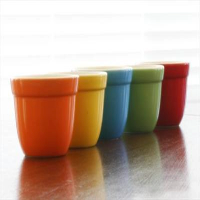

Stimulated Prediction


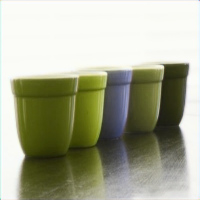

Stimulated Actual


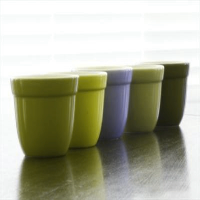

In [22]:
index = 7
inImg = X[index]
outImg = model.predict(np.array([inImg/255]))[0]*255
# cv2_imshow(np.uint8(outImg))
# cv2_imshow(np.uint8(inImg))

print('Original Image')
cv2_imshow(np.uint8(cv2.cvtColor(np.uint8(inImg), cv2.COLOR_LAB2BGR)))
print('Stimulated Prediction')
cv2_imshow(np.uint8(cv2.cvtColor(np.uint8(outImg), cv2.COLOR_LAB2BGR)))
print("Stimulated Actual")
cv2_imshow(np.uint8(cv2.cvtColor(np.uint8(Y[index]), cv2.COLOR_LAB2BGR)))


In [ ]:
#Creating map from Model
count = -1
map = {}
for inImg in X:
  count+=1
  inImg = X[count]
  outImage = model.predict(np.array([inImg/255]))[0]*255
  for x in range(0, image_Size):
    for y in range(0, image_Size):
      key = tuple(inImg[x][y])
      # print(key)
      if key in map:
        map[key].append(outImage[x][y])
      else:
        map[key] = [outImage[x][y]]
  if(count % 200 == 0):
    print(count)

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000


In [ ]:
#Creating model from stimulated image
count = -1
map2 = {}

for B in range(0, 255, 2):
  print(B)
  for G in range(0, 255, 2):
    for R in range(0, 255, 2):
      color = np.array([B, G, R])
      StimColor = CVD_Stim(np.array([color]), "Protanopia")
      map2[tuple(color)] = StimColor[0, 0]



0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254


In [ ]:
#Saving dictionary
import pickle
a_file = open("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Map_1000Images.pkl", "wb")
pickle.dump(map, a_file)
a_file.close()

# import json
# a_file = open("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Map_1000Images.json", "w")
# json.dumps(map)
# a_file.write(json)
# a_file.close()

# np.save("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Map_1000Images.mat", map) 

# a_file = open("data.pkl", "rb")
# output = pickle.load(a_file)

In [ ]:
count2 = 0
map2 = {}
print(len(map.keys()))
for key in map:
  arr = map[key]
  B,G,R = 0, 0, 0
  length = len(arr)
  for subArr in arr:
    B+=subArr[0]/length
    G+=subArr[1]/length
    R+=subArr[2]/length
    # print(subArr)
  map2[key] = [B, G, R]
  count2+=1
  if(count2 % 100000 == 0):
    print(count2)

1819934
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000


In [ ]:
map3 = {}
print(len(map2.keys()))
count3 = 0
for key in map:
  arr = map[key]
  length = len(arr)
  varB, varG, varR = 0, 0, 0
  meanArr = map2[key]
  for subArr in arr:
    varB += (pow(subArr[0] - meanArr[0], 2))/length
    varG += (pow(subArr[1] - meanArr[1], 2))/length
    varR += (pow(subArr[2] - meanArr[2], 2))/length
  map3[key] = [varB, varG, varR]
  count3+=1
  if(count3 % 1000000 == 0):
    print(count3)

In [ ]:
np.save("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Map2_4200Images_LAB.mat", map2) 
# map2 = np.load('/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Map2_1000Images.mat',allow_pickle='TRUE').item()

In [ ]:
np.save("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Map3_4200Images.mat", map3) 

In [ ]:
import numpy as np
map2 = np.load('/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Map2_4200Images_LAB.mat.npy',allow_pickle='TRUE').item() #mean
# map3 = np.load('/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Map3_1000Images.mat.npy',allow_pickle='TRUE').item() #variance

In [ ]:
map4 = {}
count4 = 0
for key in map2:
  distance = np.sum(np.power(np.array(key) - map2[key] , 2))
  map4[key] = distance
  count4+=1
  if(count4 % 100000 == 0):
    print(count4, distance, key, map4[key])

100000 68.63346129203502 (179, 121, 126) 68.63346129203502
200000 35.19301778697034 (129, 133, 133) 35.19301778697034
300000 15.069285541248448 (174, 132, 128) 15.069285541248448
400000 3701.6205993163762 (127, 174, 175) 3701.6205993163762
500000 517.8527574846507 (207, 140, 160) 517.8527574846507
600000 468.03089120058576 (204, 151, 123) 468.03089120058576
700000 235.5906031357432 (214, 118, 118) 235.5906031357432
800000 615.9439283424076 (133, 150, 138) 615.9439283424076
900000 57.16543676130874 (96, 128, 107) 57.16543676130874
1000000 1129.1309022729204 (150, 78, 183) 1129.1309022729204
1100000 302.0497639664808 (52, 152, 109) 302.0497639664808
1200000 111.0257624151086 (178, 104, 171) 111.0257624151086
1300000 2126.72193837777 (120, 174, 115) 2126.72193837777
1400000 84.78282121556606 (107, 148, 99) 84.78282121556606
1500000 85.94007271988924 (115, 165, 52) 85.94007271988924
1600000 2090.3770155746606 (192, 86, 141) 2090.3770155746606
1700000 171.41716216271743 (122, 156, 87) 171.4

In [ ]:
for key in map4:
  print(key, map4[key])
  break

(0, 0, 0) 0.0


In [ ]:
sorted_map4 = {k: v for k, v in sorted(map4.items(), key=lambda item: item[1])}

(0, 0, 0) [0. 0. 0.] 0.0
(2, 2, 2) [1.99859252 2.00230665 1.99745033] 1.3802447978704667e-05
(4, 2, 2) [3.9992793  2.00278604 1.99680165] 1.85108596806945e-05
(6, 2, 2) [5.9994345  2.00366808 1.995607  ] 3.3073060327381674e-05
(4, 4, 4) [3.99718504 4.0046133  3.99490066] 5.5209791914799686e-05
(6, 4, 4) [5.99814744 4.00499742 3.99438101] 5.997922952777429e-05
(8, 2, 2) [7.99946983 2.00498698 1.99381786] 6.336994901458555e-05
(8, 4, 4) [7.9985586  4.00557208 3.99360331] 7.404343872282877e-05
(2, 4, 4) [1.99377268 4.0044046  3.99518295] 8.138390826685522e-05
(10, 4, 4) [9.99876306 4.00634862 3.99255192] 9.730893135188854e-05
(10, 2, 2) [9.9994602  2.0067679  1.99139668] 0.00012011302361222411
COLORS THAT CHANGE THE MINIMUM


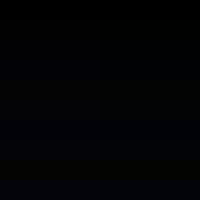

(12, 254, 0) [  2.97139822 240.86377764 240.31742439] 58006.54045114688
(30, 254, 0) [ 20.14131875 240.86392023 240.31723154] 58022.1219614285
(14, 254, 0) [  2.8045762  240.86378649 240.31741242] 58050.3563318501
(28, 254, 0) [ 16.69417676 240.86389707 240.31726287] 58052.7656724153
(16, 254, 0) [  2.58957819 240.86379699 240.31739821] 58104.851126985996
(26, 254, 0) [ 12.51704677 240.8638758  240.31729163] 58106.7484413854
(18, 254, 0) [  2.30914754 240.8638092  240.31738171] 58171.206310093396
(24, 254, 0) [  5.93632732 240.86385641 240.31731785] 58251.26779606572
(20, 254, 0) [  1.92778981 240.86382314 240.31736284] 58251.598806968366
(22, 254, 0) [  1.34138034 240.86383887 240.31734157] 58351.76195522019
COLORS THAT CHANGE THE MAXIMUM


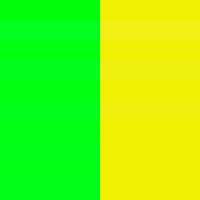

In [ ]:
count4 = 0
numDisplay = 10
Image_Size2 = numDisplay*20
lowChangeImage = np.zeros((Image_Size2, 200, 3))
highChangeImage = np.zeros((Image_Size2, 200, 3))

for key in sorted_map4:
  print(key, map2[key], sorted_map4[key])
  lowChangeImage[count4*20:(count4+1)*20, 0:100] = np.array(key)
  lowChangeImage[count4*20:(count4+1)*20, 100:200] = np.array(map2[key])
  count4+=1
  if(count4 > numDisplay):
    break

count4 = 0
print("COLORS THAT CHANGE THE MINIMUM")
cv2_imshow(lowChangeImage)
keysArr = list(sorted_map4.keys())[-numDisplay:-1]
keysArr.append(list(sorted_map4.keys())[-1])

for key in keysArr:
  print(key, map2[key], sorted_map4[key])
  highChangeImage[count4*20:(count4+1)*20, 0:100] = np.array(key)
  highChangeImage[count4*20:(count4+1)*20, 100:200] = np.array(map2[key])
  count4+=1
  if(count4 > numDisplay):
    break

# print(keys_arr[:10])
print("COLORS THAT CHANGE THE MAXIMUM")
cv2_imshow(highChangeImage)

In [ ]:
sorted_map3 = {k: v for k, v in sorted(map3.items(), key=lambda item: item[1])}

(176, 155, 130) [0.0, 0.0, 0.0]
(184, 165, 141) [0.0, 0.0, 0.0]
(192, 167, 143) [0.0, 0.0, 0.0]
(61, 55, 119) [0.0, 0.0, 0.0]
(48, 48, 109) [0.0, 0.0, 0.0]
(120, 118, 175) [0.0, 0.0, 0.0]
(188, 168, 148) [0.0, 0.0, 0.0]
(47, 45, 96) [0.0, 0.0, 0.0]
(181, 161, 138) [0.0, 0.0, 0.0]
(83, 97, 162) [0.0, 0.0, 0.0]
(43, 79, 192) [0.0, 0.0, 0.0]
(65, 91, 187) [0.0, 0.0, 0.0]
(36, 79, 217) [0.0, 0.0, 0.0]
(60, 91, 205) [0.0, 0.0, 0.0]
(55, 86, 205) [0.0, 0.0, 0.0]
(31, 77, 223) [0.0, 0.0, 0.0]
(58, 89, 207) [0.0, 0.0, 0.0]
(31, 61, 194) [0.0, 0.0, 0.0]
(25, 71, 215) [0.0, 0.0, 0.0]
(29, 60, 200) [0.0, 0.0, 0.0]
(33, 81, 220) [0.0, 0.0, 0.0]
COLORS THAT Have THE MINIMUM VARIANCE


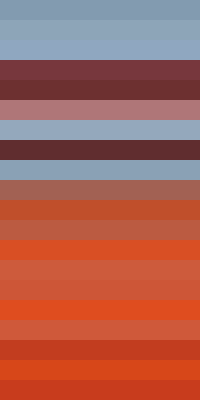

(252, 232, 204) [2767.2000000000003, 777.9999999999999, 769.0400000000001]
(251, 240, 250) [2769.6875, 681.6875, 696.6875]
(226, 245, 227) [2809.0, 1332.25, 1482.25]
(31, 39, 2) [2809.0, 2256.25, 1892.25]
(251, 227, 217) [2809.6, 780.5600000000001, 762.4000000000001]
(191, 99, 40) [2916.0, 42.25, 6.25]
(217, 180, 137) [3042.666666666667, 762.0, 491.55555555555554]
(235, 217, 209) [3073.5, 954.25, 910.6875]
(76, 75, 162) [3080.25, 812.25, 400.0]
(245, 208, 164) [3106.75, 924.75, 793.6875]
(251, 229, 193) [3242.0000000000005, 837.5555555555557, 939.5555555555555]
(214, 248, 241) [3249.0, 702.25, 1056.25]
(255, 234, 245) [3416.888888888889, 597.5555555555555, 1354.888888888889]
(212, 194, 202) [3449.5555555555557, 1417.5555555555557, 1208.6666666666667]
(239, 249, 228) [3481.0, 841.0, 1225.0]
(217, 232, 233) [3698.666666666667, 3474.8888888888887, 3669.555555555556]
(250, 159, 95) [3844.0, 552.25, 289.0]
(222, 251, 247) [3844.0, 1122.25, 1332.25]
(249, 234, 175) [4160.25, 1122.25, 729.0]


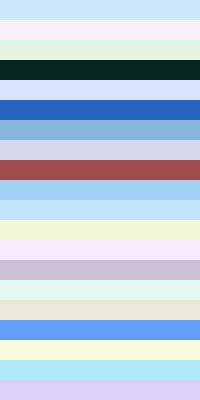

In [ ]:
count4 = 0
numDisplay = 20
Image_Size2 = numDisplay*20
lowChangeImage = np.zeros((Image_Size2, 200, 3))
highChangeImage = np.zeros((Image_Size2, 200, 3))

for key in sorted_map3:
  print(key, sorted_map3[key])
  lowChangeImage[count4*20:(count4+1)*20, :] = np.array(key)
  count4+=1
  if(count4 > numDisplay):
    break

count4 = 0
print("COLORS THAT Have THE MINIMUM VARIANCE")
cv2_imshow(lowChangeImage)
keysArr = list(sorted_map3.keys())[-numDisplay:-1]
keysArr.append(list(sorted_map3.keys())[-1])

for key in keysArr:
  print(key, sorted_map3[key])
  highChangeImage[count4*20:(count4+1)*20, :] = np.array(key)
  count4+=1
  if(count4 > numDisplay):
    break

# print(keys_arr[:10])
print("COLORS THAT Have THE MAXIMUM VARIANCE")
cv2_imshow(highChangeImage)

In [ ]:
#Kmeans

dist = np.ones((len(map4.keys()), 1))
count = 0
for key in map4:
  dist[count] = map4[key]
  count+=1




In [ ]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(dist)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:

# y_kmeans = kmeans.predict(dist)
# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
print(centers, dist.shape)
# print(kmeans.predict(np.array([90]).reshape(1, -1)))
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

[[ 256.45735749]
 [3243.53888328]
 [1411.32617036]
 [5943.08166699]] (1819934, 1)


In [ ]:
# index = 1000
# print(list(map4.keys())[index],list(map4.values())[index], map4[list(map4.keys())[index]])

arr = np.array(list(map4.values())).reshape(-1, 1)
print(arr.shape)
pred_Val = kmeans.predict(arr) # pred is used to define clusters


(1819934, 1)


In [ ]:
minIndex = np.argmin(np.array( kmeans.cluster_centers_))
# print(minIndex)
cluster1 = np.array(list(map4.keys()))[pred_Val == minIndex] #Colors that can be perceived by CVD user
cluster2 = np.array(list(map4.keys()))[pred_Val != minIndex]#colors that cannot be perceived

In [ ]:
print(cluster1.shape)
print(cluster2.shape)
print("Cluster  percentage", cluster1.shape[0]*100/(cluster1.shape[0] + cluster2.shape[0]))
# index = 11
# print(map4[tuple(cluster1[index])])
# print(map4[tuple(cluster2[index])])

# print(cluster2[6])

(1179627, 3)
(640307, 3)
Cluster  percentage 64.81702083701937


In [ ]:
cluster1Map = {}
for elem in cluster1:
  elem = tuple(elem)
  cluster1Map[elem] = True

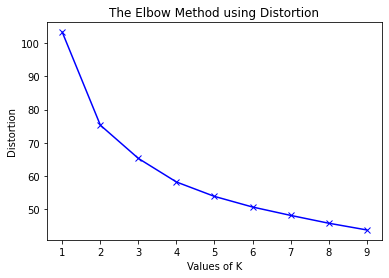

In [ ]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    print(k)
    kmeanModel = KMeans(n_clusters=k) 
    kmeanModel.fit(cluster1)     
      
    distortions.append(sum(np.min(cdist(cluster1, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / cluster1.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(cluster1, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / cluster1.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

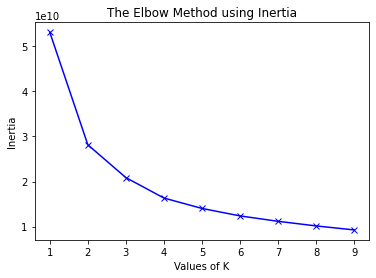

In [ ]:

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [ ]:
num_Cluster = 10
kmeans2 = KMeans(n_clusters = num_Cluster)
kmeans2.fit(cluster1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

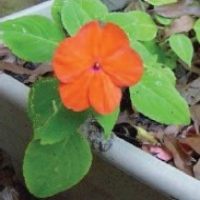

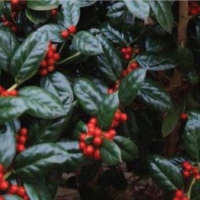

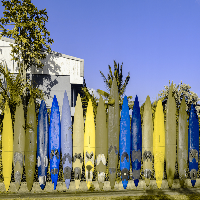

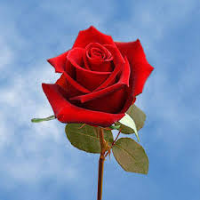

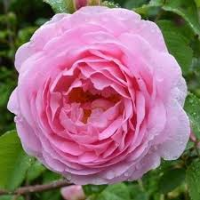

In [ ]:
dirPath = "/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Imgs_Model"
count = 0
X2 = []
for file in os.listdir(dirPath):
    if file.endswith(".jpg"):
      count+=1
      image = np.array(cv2.resize(cv2.imread(dirPath + "/" + file), (image_Size, image_Size)))
      X2.append(image)
      # X2.append(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
      cv2_imshow(image)
      if(count > 10):
        break





In [ ]:
myset = set() 

for img in X2:
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      color = img[x, y].reshape(1, -1)
      # print(color.shape)
      clstr = kmeans2.predict(color)[0]
      # print(clstr)
      myset.add(clstr)
  print(myset)
      

{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5}


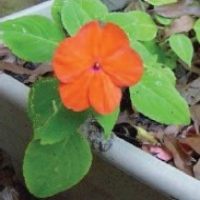

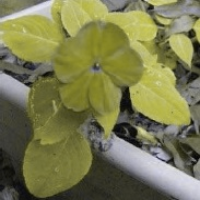

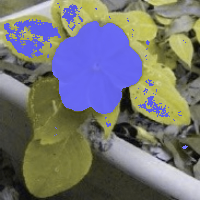

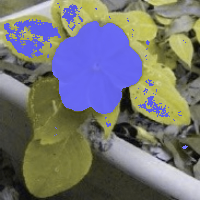

7593


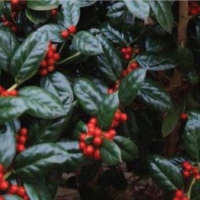

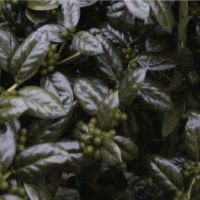

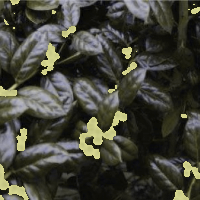

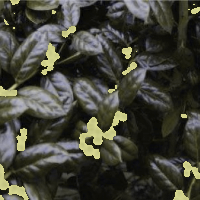

2376


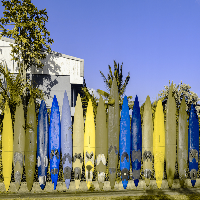

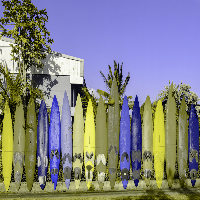

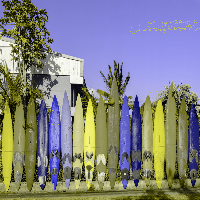

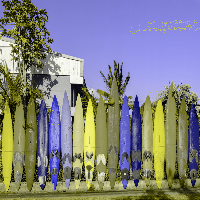

130


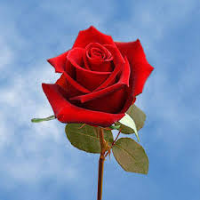

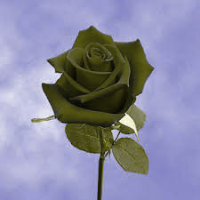

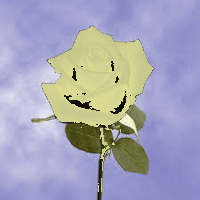

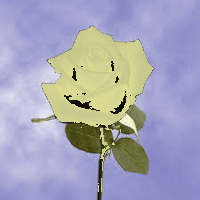

7139


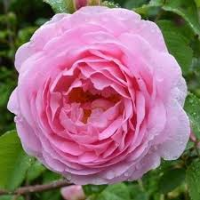

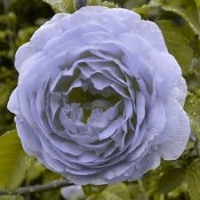

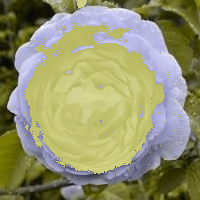

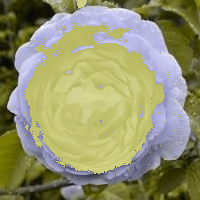

14551


In [ ]:
import copy 
threshold = 0.2
clstrArr = np.zeros((num_Cluster, 1))
centers2 = np.uint8(kmeans2.cluster_centers_) #Have to add code for more than 1 cluster arr
countColorchange = 0
for image in X2: 
  img = copy.deepcopy(image)
  cv2_imshow(img)
  cv2_imshow(np.uint8(CVD_Stim(img, "Protanopia")))
  img = np.uint8(cv2.cvtColor(np.uint8(img), cv2.COLOR_BGR2LAB))
  # img = np.array(cv2.resize(cv2.imread("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/rgb.jpg"), (image_Size, image_Size)))

  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      color = img[x, y].reshape(1, -1)
      # print(color[0], color.shape, cluster1Map.get(tuple(color[0])))
      # if cluster1Map.get(tuple(color[0])) != None or  cluster1Map.get(tuple(np.array(color[0]) - np.array(color[0])%2))!=None :
      if cluster1Map.get(tuple(color[0])) != None :
        if(x%1 == 0):
          clstr = kmeans2.predict(color)[0]
          # print(clstr)
          clstrArr[clstr]+=1
      else:
        img[x, y] = centers2[np.argmin(clstrArr)] - threshold*img[x, y]
        countColorchange+=1
    # if(x%10 == 0):
    #   print(x, countColorchange)
  # print(list(clstrArr))

  img = np.uint8(cv2.cvtColor(np.uint8(img), cv2.COLOR_LAB2BGR))
  cv2_imshow(img)
  cv2_imshow(np.uint8(CVD_Stim(img, "Protanopia")))
  print(countColorchange)
  countColorchange = 0
  clstrArr = np.zeros((num_Cluster, 1))
  # break
      

In [ ]:
def farthestCluster(clusterCenterArr, cluster):
  curDist = 0
  ans = []
  for center in clusterCenterArr:
    if np.sum(np.power(np.array(center - cluster), 2)) > curDist:
      curDist = np.sum(np.power(np.array(center - cluster), 2))
      ans = center
  
  return ans


LAB COLOR SPACE
Actual Image


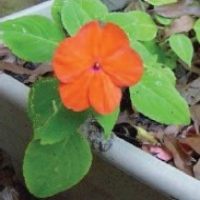

Actual Stimulation


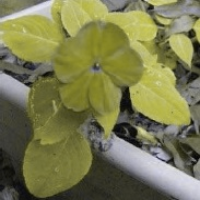

Recolored Image


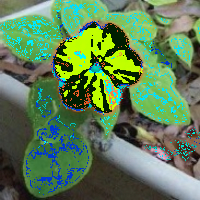

Recolored Stimulation


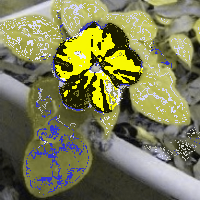

Actual Image


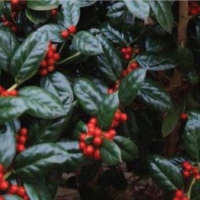

Actual Stimulation


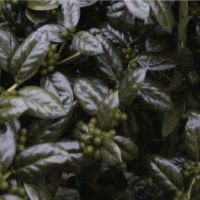

Recolored Image


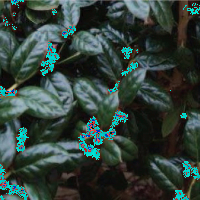

Recolored Stimulation


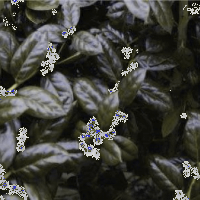

Actual Image


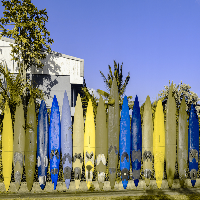

Actual Stimulation


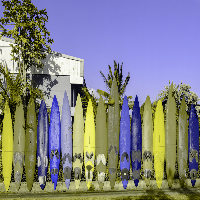

Recolored Image


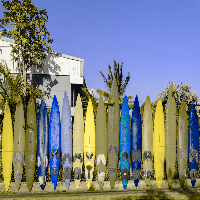

Recolored Stimulation


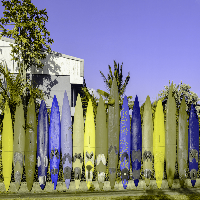

Actual Image


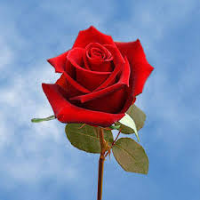

Actual Stimulation


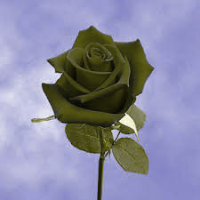

Recolored Image


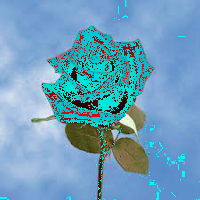

Recolored Stimulation


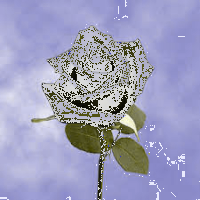

Actual Image


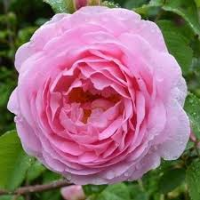

Actual Stimulation


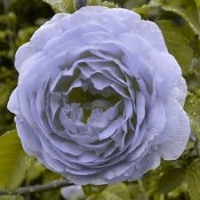

Recolored Image


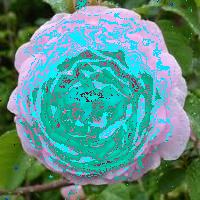

Recolored Stimulation


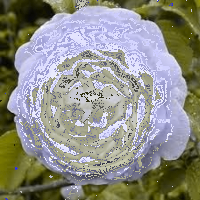

In [ ]:
#My approach
print("LAB COLOR SPACE")
threshold = 0.5
#Define n number of clusters on the whole color space. 
minClusterCenter = min(kmeans.cluster_centers_)
minIndex = np.argmin(np.array( kmeans.cluster_centers_))
for image in X2:
  img = copy.deepcopy(image)
  print("Actual Image")
  cv2_imshow(img)
  print("Actual Stimulation")
  cv2_imshow(np.uint8(CVD_Stim(img, "Protanopia")))
  stimImg = cv2.cvtColor(np.uint8(CVD_Stim(img, "Protanopia")), cv2.COLOR_BGR2LAB)
  img = np.uint8(cv2.cvtColor(np.uint8(img), cv2.COLOR_BGR2LAB))
  
  # print(np.diff(img, stimImg).shape)
  diffImg = np.power(img - stimImg, 2)



  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      if np.sum(diffImg[x, y]) > minClusterCenter:
      # if kmeans.predict(np.sum(diffImg[x, y]).reshape(1, -1))[0] == minIndex:
        color = stimImg[x, y].reshape(1, -1)
        colorCluster = kmeans2.predict(tuple(color))[0]
        # print(type(img))
        img[x, y] = np.uint8(farthestCluster(kmeans2.cluster_centers_, kmeans2.cluster_centers_[colorCluster]))  - threshold*img[x, y]

  img = np.uint8(cv2.cvtColor(np.uint8(img), cv2.COLOR_LAB2BGR))
  print("Recolored Image")
  cv2_imshow(img)
  print("Recolored Stimulation")
  cv2_imshow(np.uint8(CVD_Stim(img, "Protanopia")))


#Think about forming clusters within the image. I mean practically, visualise it


In [ ]:
def denoise(img, weight=0.1, eps=1e-3, num_iter_max=200):
    """Perform total-variation denoising on a grayscale image.
    
    Parameters
    ----------
    img : array
        2-D input data to be de-noised.
    weight : float, optional
        Denoising weight. The greater `weight`, the more
        de-noising (at the expense of fidelity to `img`).
    eps : float, optional
        Relative difference of the value of the cost
        function that determines the stop criterion.
        The algorithm stops when:
            (E_(n-1) - E_n) < eps * E_0
    num_iter_max : int, optional
        Maximal number of iterations used for the
        optimization.

    Returns
    -------
    out : array
        De-noised array of floats.
    
    Notes
    -----
    Rudin, Osher and Fatemi algorithm.
    """
# The first step is to allocate memory for an initial guess of the clean image (u), which we will improve on iteratively, 
# and the two components of the dual variable (px, py). We choose a fixed time step (tau), which should be smaller or equal 1/8 (Chambolle, 2005). We then iterate until we hit the maximum number of iterations (num_iter_max):

    u = np.zeros_like(img)
    px = np.zeros_like(img)
    py = np.zeros_like(img)
    
    nm = np.prod(img.shape[:2])
    tau = 0.125
    
    i = 0
    while i < num_iter_max:
        u_old = u
# To compute the gradient of the primal variable, NumPy's roll comes in handy: As the name suggests, the function "rolls" the values of an array cyclically around an axis. This is very convenient for computing neighbor differences, in this case for derivatives:

        # x and y components of u's gradient
        ux = np.roll(u, -1, axis=1) - u
        uy = np.roll(u, -1, axis=0) - u
# Per Eq. 11 of Chambolle (2005), the dual variable depends on the gradient of the primal variable, which we just computed. Note that weight corresponds to λ in the paper.

        
        # update the dual variable
        px_new = px + (tau / weight) * ux
        py_new = py + (tau / weight) * uy
# We normalize the dual variable such that the vector (px,py) has length 1:

        norm_new = np.maximum(1, np.sqrt(px_new **2 + py_new ** 2))
        px = px_new / norm_new
        py = py_new / norm_new
# Then we calculate the divergence of P, again by using NumPy's roll function, and update our current best guess of a cleaned-up image (u):

        # calculate divergence
        rx = np.roll(px, 1, axis=1)
        ry = np.roll(py, 1, axis=0)
        div_p = (px - rx) + (py - ry)
        
        # update image
        u = img + weight * div_p
# We can measure the improvement in error for the current iteration step by comparing u to u_old from the previous step:

        
        # calculate error
        error = np.linalg.norm(u - u_old) / np.sqrt(nm)
# Finally, we check the stop criterion to determine whether we are done, otherwise we keep iterating:

        if i == 0:
            err_init = error
            err_prev = error
        else:
            # break if error small enough
            if np.abs(err_prev - error) < eps * err_init:
                break
            else:
                e_prev = error
                
        # don't forget to update iterator
        i += 1
    print("I GUESS KUCH HUA HAI")
    return np.uint8(u)

In [ ]:
def crimmins(data):
    new_image = data.copy()
    nrow = len(data)
    ncol = len(data[0])
    
    # Dark pixel adjustment
    
    # First Step
    # N-S
    for i in range(1, nrow):
        for j in range(ncol):
            if data[i-1,j] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(ncol-1):
            if data[i,j+1] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(1, nrow):
        for j in range(1, ncol):
            if data[i-1,j-1] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    #NE-SW
    for i in range(1, nrow):
        for j in range(ncol-1):
            if data[i-1,j+1] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    # Second Step
    # N-S
    for i in range(1, nrow-1):
        for j in range(ncol):
            if (data[i-1,j] > data[i,j]) and (data[i,j] <= data[i+1,j]):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1, ncol-1):
            if (data[i,j+1] > data[i,j]) and (data[i,j] <= data[i,j-1]):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i-1,j-1] > data[i,j]) and (data[i,j] <= data[i+1,j+1]):
                new_image[i,j] += 1
    data = new_image
    # NE-SW
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i-1,j+1] > data[i,j]) and (data[i,j] <= data[i+1,j-1]):
                new_image[i,j] += 1
    data = new_image
    #Third Step
    # N-S
    for i in range(1, nrow-1):
        for j in range(ncol):
            if (data[i+1,j] > data[i,j]) and (data[i,j] <= data[i-1,j]):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1, ncol-1):
            if (data[i,j-1] > data[i,j]) and (data[i,j] <= data[i,j+1]):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i+1,j+1] > data[i,j]) and (data[i,j] <= data[i-1,j-1]):
                new_image[i,j] += 1
    data = new_image
    # NE-SW
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i+1,j-1] > data[i,j]) and (data[i,j] <= data[i-1,j+1]):
                new_image[i,j] += 1
    data = new_image
    # Fourth Step
    # N-S
    for i in range(nrow-1):
        for j in range(ncol):
            if (data[i+1,j] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1,ncol):
            if (data[i,j-1] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(nrow-1):
        for j in range(ncol-1):
            if (data[i+1,j+1] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    # NE-SW
    for i in range(nrow-1):
        for j in range(1,ncol):
            if (data[i+1,j-1] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    
    # Light pixel adjustment
    
    # First Step
    # N-S
    for i in range(1,nrow):
        for j in range(ncol):
            if (data[i-1,j] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(ncol-1):
            if (data[i,j+1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(1,nrow):
        for j in range(1,ncol):
            if (data[i-1,j-1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(1,nrow):
        for j in range(ncol-1):
            if (data[i-1,j+1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # Second Step
    # N-S
    for i in range(1,nrow-1):
        for j in range(ncol):
            if (data[i-1,j] < data[i,j]) and (data[i,j] >= data[i+1,j]):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1, ncol-1):
            if (data[i,j+1] < data[i,j]) and (data[i,j] >= data[i,j-1]):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i-1,j-1] < data[i,j]) and (data[i,j] >= data[i+1,j+1]):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i-1,j+1] < data[i,j]) and (data[i,j] >= data[i+1,j-1]):
                new_image[i,j] -= 1
    data = new_image
    # Third Step
    # N-S
    for i in range(1,nrow-1):
        for j in range(ncol):
            if (data[i+1,j] < data[i,j]) and (data[i,j] >= data[i-1,j]):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1,ncol-1):
            if (data[i,j-1] < data[i,j]) and (data[i,j] >= data[i,j+1]):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i+1,j+1] < data[i,j]) and (data[i,j] >= data[i-1,j-1]):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i+1,j-1] < data[i,j]) and (data[i,j] >= data[i-1,j+1]):
                new_image[i,j] -= 1
    data = new_image
    # Fourth Step
    # N-S
    for i in range(nrow-1):
        for j in range(ncol):
            if (data[i+1,j] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1,ncol):
            if (data[i,j-1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(nrow-1):
        for j in range(ncol-1):
            if (data[i+1,j+1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(nrow-1):
        for j in range(1,ncol):
            if (data[i+1,j-1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    return new_image.copy()


In [ ]:
def conservative_smoothing_gray(data, filter_size):
    temp = []
    indexer = filter_size // 2
    new_image = data.copy()
    nrow, ncol = data.shape
    for i in range(nrow):
        for j in range(ncol):
            for k in range(i-indexer, i+indexer+1):
                for m in range(j-indexer, j+indexer+1):
                    if (k > -1) and (k < nrow):
                        if (m > -1) and (m < ncol):
                            temp.append(data[k,m])
            temp.remove(data[i,j])
            max_value = max(temp)
            min_value = min(temp)
            if data[i,j] > max_value:
                new_image[i,j] = max_value
            elif data[i,j] < min_value:
                new_image[i,j] = min_value
            temp =[]
    return new_image.copy()

Original Image


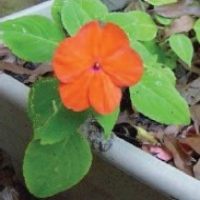

Original Stim Image


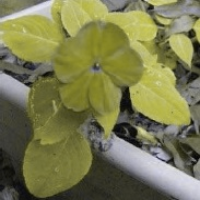

Recolored Image


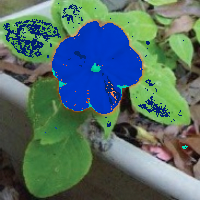

Recolored Denoised Image


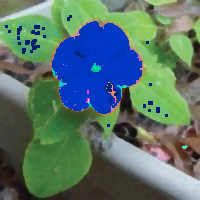

Recolored Stim Image


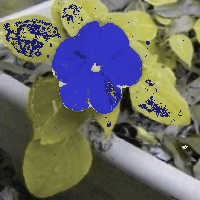

Recolored Stim Denoised Image


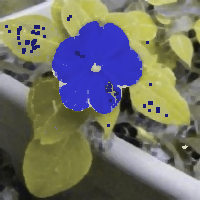

Original Image


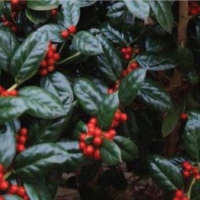

Original Stim Image


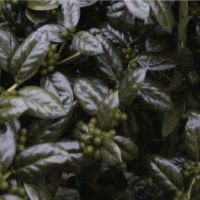

Recolored Image


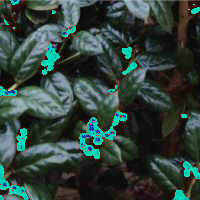

Recolored Denoised Image


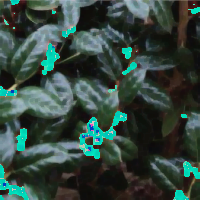

Recolored Stim Image


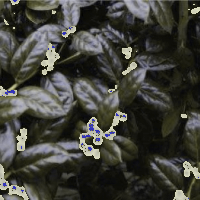

Recolored Stim Denoised Image


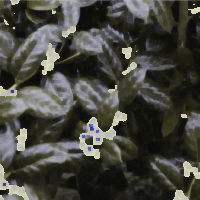

Original Image


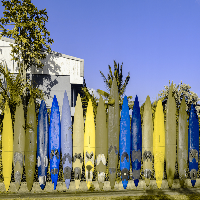

Original Stim Image


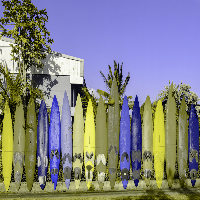

Recolored Image


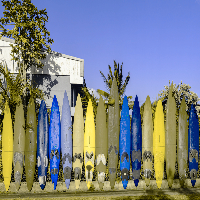

Recolored Denoised Image


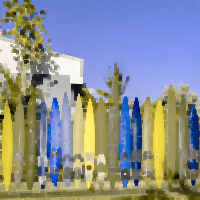

Recolored Stim Image


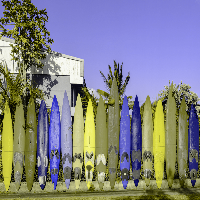

Recolored Stim Denoised Image


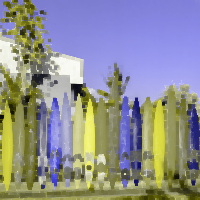

Original Image


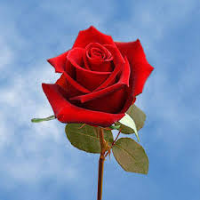

Original Stim Image


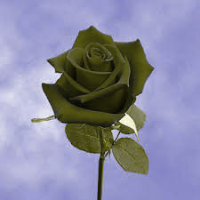

Recolored Image


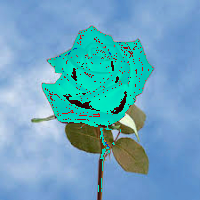

Recolored Denoised Image


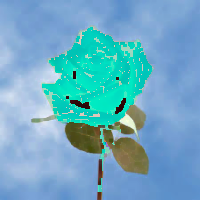

Recolored Stim Image


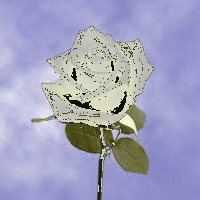

Recolored Stim Denoised Image


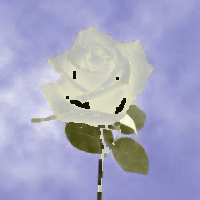

Original Image


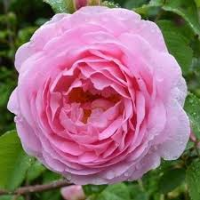

Original Stim Image


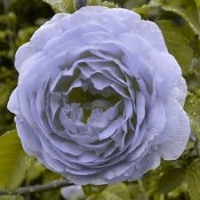

Recolored Image


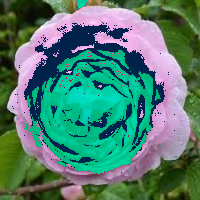

Recolored Denoised Image


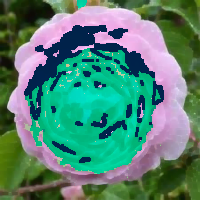

Recolored Stim Image


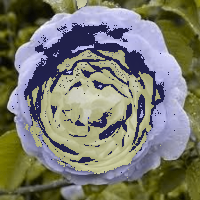

Recolored Stim Denoised Image


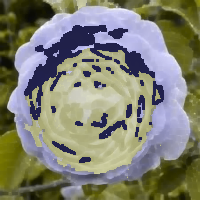

In [ ]:
#Combination of distance and mapping ideas


def deNoising(img):
  # img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 11, 21)
  kernel_Size = 3
  kernel_dilate = np.ones((kernel_Size,kernel_Size),np.uint8)
  kernel_erode = np.ones((kernel_Size,kernel_Size),np.uint8)
  img = cv2.dilate(img,kernel_dilate,iterations = 1)
  img = cv2.erode(img,kernel_erode,iterations = 1)
  # img = cv2.dilate(img,kernel_dilate,iterations = 1)
  # img = cv2.medianBlur(img, kernel_Size)
  # img = cv2.bilateralFilter(img,9,75,75)

  #Upsharping
  # img = Image.fromarray(img.astype('uint8'))
  # img = np.array(img.filter(ImageFilter.UnsharpMask(radius=5, percent=150)))
  return img



import copy 
threshold = 0.4
clstrArr = np.zeros((num_Cluster, 1))
minClusterCenter = min(kmeans.cluster_centers_)
minIndex = np.argmin(np.array( kmeans.cluster_centers_))
countColorchange = 0
num_Cluster_Img = 5
pixel_range = 3
for image in X2: 
  img = copy.deepcopy(image)
  imgTest = np.zeros(img.shape)
  print("Original Image")
  cv2_imshow(img)
  print("Original Stim Image")
  cv2_imshow(np.uint8(CVD_Stim(img, "Protanopia")))
  stimImg = cv2.cvtColor(np.uint8(CVD_Stim(img, "Protanopia")), cv2.COLOR_BGR2LAB)
  img = np.uint8(cv2.cvtColor(np.uint8(img), cv2.COLOR_BGR2LAB))
  kmeans3 = KMeans(n_clusters = num_Cluster_Img)
  # print(img.shape, type(img), img[:, :, 0].shape, img[:, :, 0].flatten().reshape(-1, 1).shape)
  clr =  np.concatenate((img[:, :, 0].flatten().reshape(-1, 1), img[:, :, 1].flatten().reshape(-1, 1), img[:, :, 2].flatten().reshape(-1, 1)), axis = 1)
  # print(img.shape, img.flatten().shape, img.flatten()[0], clr.shape, clr[0] )
  kmeans3.fit(clr)
  # img = np.array(cv2.resize(cv2.imread("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/rgb.jpg"), (image_Size, image_Size)))
  diffImg = np.power(img - stimImg, 2)
  for x in range(img.shape[0]):
    # if (x%50 == 0):
    #   print(x)
    for y in range(img.shape[1]):
      color = img[x, y].reshape(1, -1)
      # print(color[0], color.shape, cluster1Map.get(tuple(color[0])))
      # if cluster1Map.get(tuple(color[0])) != None or  cluster1Map.get(tuple(np.array(color[0]) - np.array(color[0])%2))!=None :
      if cluster1Map.get(tuple(color[0])) != None or np.sum(diffImg[x, y]) < 0.5*minClusterCenter:
        # if(x%1 == 0):
        #   clstr = kmeans2.predict(color)[0]
        #   # print(clstr)
        #   clstrArr[clstr]+=1
        continue
      else:
        # img[x, y] = centers2[np.argmin(clstrArr)] - threshold*img[x, y]
        # countColorchange+=1
        clstr = kmeans3.predict([img[x, y]])[0]
        color = stimImg[x, y].reshape(1, -1)
        colorCluster = kmeans2.predict(tuple(color))[0]
        color_recolor = np.uint8(np.clip(farthestCluster(kmeans2.cluster_centers_, kmeans2.cluster_centers_[colorCluster]) - threshold*img[x, y], 0, 255))
        img[x, y] = color_recolor
        imgTest[x, y] = [255, 255, 255]
        # for x2 in range(max(x - pixel_range, 0), min(x + pixel_range, img.shape[0])):
        #   for y2 in range(max(y - pixel_range, 0), min(y + pixel_range, img.shape[1])):
        #     if kmeans3.predict([img[x2, y2]])[0] == clstr:
        #       img[x2, y2] = color_recolor
        #       imgTest[x2, y2] = [255, 255, 255]
    # if(x%10 == 0):
    #   print(x, countColorchange)

  # print(list(clstrArr))

  img = np.uint8(cv2.cvtColor(np.uint8(img), cv2.COLOR_LAB2BGR))
  img_denoised = np.zeros(img.shape)
  img_denoised = deNoising(copy.deepcopy(img))
  # imgTest = np.uint8(np.clip((img - img_denoised), 0, 255))
  # img_denoised[:, :, 0] =  denoise(img[:, :, 0], weight=0.5, eps=1e-5)
  # img_denoised[:, :, 1] =  denoise(img[:, :, 1], weight=0.5, eps=1e-5)
  # img_denoised[:, :, 2] =  denoise(img[:, :, 2], weight=0.5, eps=1e-5)

  # img_denoised[:, :, 0] =  crimmins(img[:, :, 0])
  # img_denoised[:, :, 1] =  crimmins(img[:, :, 1])
  # img_denoised[:, :, 2] =  crimmins(img[:, :, 2])

  # img_denoised[:, :, 0] = conservative_smoothing_gray(img[:, :, 0], 9)
  # img_denoised[:, :, 1] = conservative_smoothing_gray(img[:, :, 1], 9)
  # img_denoised[:, :, 2] = conservative_smoothing_gray(img[:, :, 2], 9)
  print("Recolored Image")
  cv2_imshow(img)
  print("Recolored Denoised Image")
  cv2_imshow(img_denoised)
  print("Recolored Stim Image")
  cv2_imshow(np.uint8(CVD_Stim(img, "Protanopia")))
  print("Recolored Stim Denoised Image")
  cv2_imshow(np.uint8(CVD_Stim(img_denoised, "Protanopia")))
  # print("MASK")
  # cv2_imshow(imgTest)
  # print(countColorchange)
  countColorchange = 0
  clstrArr = np.zeros((num_Cluster, 1))

In [ ]:
print(np.clip([-1, 2, 4, 234, 255, 256, 289], 0, 255))

[  0   2   4 234 255 255 255]


In [ ]:
print(minClusterCenter)

[872.57942543]


In [ ]:
#Neural Net model


"""
input2 = Input(shape=(1700,388), name = 'Image_input')
highway2 = Highway()(input2)
highway3 = Highway()(highway2)
highway4 = Highway()(highway3)
# dense8 = Dense(1000)(highway4)
# dense9 = Dense(500)(dense8)
dense7 = Dense(200)(highway4)
dense2 = Dense(74)(dense7) 

lstm = LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)(merge)
output = Dense(1, activation='sigmoid')(lstm)
model = Model(inputs=[input1, input2, input3], outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model)
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy')

model.fit([video_train],Ytrain, validation_split = 0.2, callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='min',
    baseline=None, restore_best_weights=True),epochs=50, batch_size = 2)

"""
import keras.backend as K
def custom_loss_function(image_Actual, image_Pred):
  image_Pred = image_Pred.numpy()
  for index in range(image_Pred.shape[0]):
    image_Pred[index] = CVD_Stim(image_Pred[index], "Protanopia")
  # image_Pred = tf.convert_to_tensor(image_Pred)
  loss = K.square(image_Actual - image_Pred)
  print(loss.shape)
  return loss



model = Sequential()

#1st convolution layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_Size,image_Size,3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#2nd convolution layer
model.add(Conv2D(16,(3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(8,(3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(4,(3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(3,(3, 3), padding='same'))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss=custom_loss_function, run_eagerly=True)

In [ ]:
model.summary()
print(Xtrain.shape)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 200, 200, 16)      4624      
_________________________________________________________________
activation_6 (Activation)    (None, 200, 200, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 200, 200, 8)       1160      
_________________________________________________________________
activation_7 (Activation)    (None, 200, 200, 8)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 200, 200, 4)      

In [ ]:
model.fit(Xtrain/255, Xtrain/255,
                epochs=10,
                batch_size=16,
                shuffle=True,
                validation_data=(Xtest/255, Xtest/255))

Epoch 1/10
(16, 200, 200, 3)


ValueError: ignored

In [ ]:
inImg = X[1000]
outImg = model.predict(np.array([inImg/255]))[0]*255
cv2_imshow(np.uint8(outImg))
cv2_imshow(np.uint8(inImg))

In [ ]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from keras.models import load_model
import keras.backend as K

def custom_loss(layer):
  #Layer is the recolored output
  def custom_loss_function(image_Actual, image_Pred):
    # cv2_imshow(np.uint8(layer[0].numpy()*255))

    loss = K.mean(K.square(layer - image_Pred)) + K.mean(K.square(image_Pred - image_Actual)) #First term is a heavy penalty term
    loss1 = K.mean(K.square(layer - image_Pred))
    loss2 = K.square(layer - image_Actual)
    loss3 = K.sum(K.square(layer - image_Pred)) + K.sum(K.square(layer - image_Actual)) #First term is a heavy penalty term

    # print(K.sum(loss1, axis = 1), K.sum(loss2, axis = 1), loss.shape)

    return loss

  return custom_loss_function

tf.compat.v1.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()
input = Input(shape = (image_Size,image_Size,3), name = 'Input')
conv_1 = Conv2D(32,(3, 3), padding='same')(input)
actv_1 = Activation('relu')(conv_1)
# conv_1.trainable = False
conv_2 = Conv2D(16,(3, 3), padding='same')
conv_2T = conv_2(actv_1)
actv_2 = Activation('relu')(conv_2T)
# conv_2.trainable = False
conv_3 = Conv2D(8,(3, 3), padding='same')(actv_2)
actv_3 = Activation('relu')(conv_3)
# conv_3.trainable = False
conv_4 = Conv2D(4,(3, 3), padding='same', activation = 'relu')(actv_3)
actv_4 = Activation('relu')(conv_4)
# conv_4.trainable = False
conv_5 = Conv2D(3,(3, 3), padding='same', activation = 'sigmoid')(actv_4)
actv_5 = Activation('sigmoid')(conv_5)
# conv_5.trainable = False
modelA = Model(inputs = input, outputs = actv_5)
# modelA.trainable = False
modelA_layers_len = len(modelA.layers)
print(modelA.summary())


dirPath = "/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/model_4200Images_Epochs15.h5"
modelA = load_model(dirPath)
print(conv_weights.shape, np.array(modelA.layers[2].get_weights()).flatten().shape)

# for index in range(0, len(modelA.layers)):
#     # zero_weights = np.zeros(np.array(modelB.layers[index].get_weights).shape)
#     print(index, np.array(modelA.layers[index].get_weights()).shape)

# layer = np.array(model.layers[1].get_weights())
# print(conv_weights.shape, layer.shape, model.layers[1] )
# print(np.sum(layer - conv_weights))


conv_1B = Conv2D(32,(3, 3), padding='same', trainable = False)(actv_5)
actv_1B = Activation('relu')(conv_1B)
conv_2B = Conv2D(16,(3, 3), padding='same', trainable = False)
conv_2TB = conv_2B(actv_1B)
actv_2B = Activation('relu')(conv_2TB)
conv_3B = Conv2D(8,(3, 3), padding='same', trainable = False)(actv_2B)
actv_3B = Activation('relu')(conv_3B)
conv_4B = Conv2D(4,(3, 3), padding='same', activation = 'relu', trainable = False)(actv_3B)
actv_4B = Activation('relu')(conv_4B)
conv_5B = Conv2D(3,(3, 3), padding='same', activation = 'sigmoid', name = 'Stim_Layer', trainable = False)(actv_4B)
actv_5B = Activation('sigmoid')(conv_5B)

# conv_1B = Conv2D(32,(3, 3), padding='same', activation = 'relu', trainable = False)(actv_5)
# conv_2B = Conv2D(16,(3, 3), padding='same', activation = 'relu', trainable = False)(conv_1B)
# conv_3B = Conv2D(8,(3, 3), padding='same', activation = 'relu', trainable = False)(conv_2B)
# conv_4B = Conv2D(4,(3, 3), padding='same', activation = 'relu', trainable = False)(conv_3B)
# conv_5B = Conv2D(3,(3, 3), padding='same', activation = 'sigmoid', trainable = False)(conv_4B)

modelB = Model(inputs = input ,outputs = actv_5B)
# dirPath = "/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/model_4200Images_Epochs15.h5"
# modelB = load_model(dirPath) #ModelB is the Stimulated Model
# modelB.trainable = False
print(modelB.summary())
# # plot_model(modelB)
conv_weights = np.array(conv_2B.get_weights()).flatten()
print(modelA_layers_len, conv_weights.shape, np.array(modelA.layers[2].get_weights()).flatten().shape)

# modelC = Model(inputs = input ,outputs = conv_5B)











Model: "functional_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 200, 200, 32)      896       
_________________________________________________________________
activation_95 (Activation)   (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 200, 200, 16)      4624      
_________________________________________________________________
activation_96 (Activation)   (None, 200, 200, 16)      0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 200, 200, 8)       1160      
_________________________________________________________________
activation_97 (Activation)   (None, 200, 200, 8)     

In [ ]:
#Adding weights to modelB using modelA
print(len(modelB.layers), modelA_layers_len )
for index in range(1, modelA_layers_len):
  try:
    modelB.layers[modelA_layers_len - 1 + index].set_weights(modelA.layers[index - 1].get_weights())
  except Exception as e: 
    print(index, e)
    # zero_weights = np.zeros(np.array(modelB.layers[index].get_weights).shape)
    # print(index, np.array(modelB.layers[index].get_weights()).shape)
    # modelB.layers[index].set_weights(zero_weights)

modelB.compile(optimizer='adam', loss=custom_loss(actv_5), run_eagerly = False)
# modelB.compile(optimizer='adam', loss=custom_loss(conv_5), run_eagerly = True)
# plot_model(modelA)


21 11


In [ ]:

#Proof modelA is working
index = 2
indexB = modelA_layers_len - 1 + index
weights = np.array(modelA.layers[index - 1].get_weights()).flatten() #-1 because modelA doesnt have any input layer.
weightsB = np.array(modelB.layers[indexB].get_weights()).flatten()
# print(weights)
print(weights.shape, conv_weights.shape, weightsB.shape)
# print(weights[0][0][0][1])
# print("jhjhjhjhjhj")
# print(conv_weights[0][0][0][1])
# print(np.sum(weightsB - conv_weights))
print(np.sum(weightsB - weights))
# print(weights.shape, np.sum(np.array(layer.get_weights()) - conv_weights))

(0,) (2,) (0,)
0.0


In [ ]:

modelB.fit(Xtrain/255, Xtrain/255,
                epochs=10,
                batch_size=8,
                shuffle=True,
                validation_data=(Xtest/255, Xtest/255))

Train on 3150 samples, validate on 351 samples
Epoch 1/10
3150/3150 [==============================] - 439s 139ms/sample - loss: 0.1322 - val_loss: 0.1294
Epoch 2/10
3150/3150 [==============================] - 436s 138ms/sample - loss: 0.1311 - val_loss: 0.1293
Epoch 3/10
3150/3150 [==============================] - 434s 138ms/sample - loss: 0.1311 - val_loss: 0.1293
Epoch 4/10
3150/3150 [==============================] - 435s 138ms/sample - loss: 0.1310 - val_loss: 0.1293
Epoch 5/10
3150/3150 [==============================] - 433s 137ms/sample - loss: 0.1310 - val_loss: 0.1293
Epoch 6/10
3150/3150 [==============================] - 433s 137ms/sample - loss: 0.1310 - val_loss: 0.1292
Epoch 7/10
3150/3150 [==============================] - 432s 137ms/sample - loss: 0.1310 - val_loss: 0.1292
Epoch 8/10
3150/3150 [==============================] - 431s 137ms/sample - loss: 0.1310 - val_loss: 0.1292
Epoch 9/10
3150/3150 [==============================] - 430s 136ms/sample - loss: 0.1310 

ModelB precition


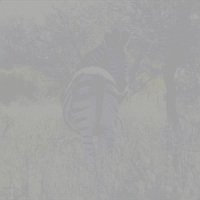

Input image


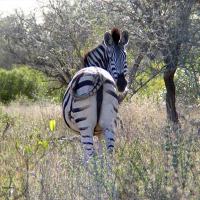

prediction stim


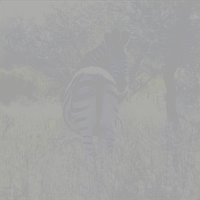

ModelB precition


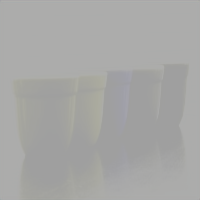

Input image


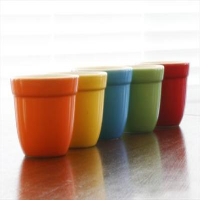

prediction stim


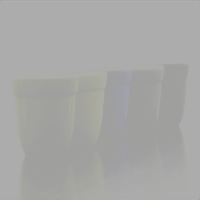

ModelB precition


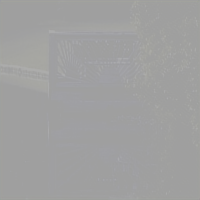

Input image


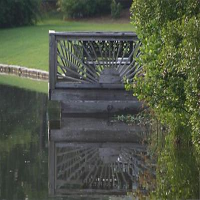

prediction stim


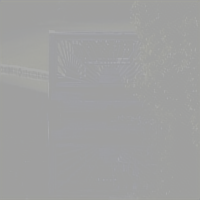

ModelB precition


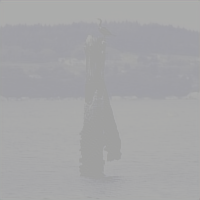

Input image


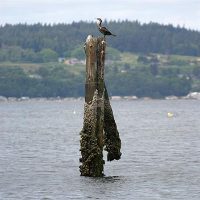

prediction stim


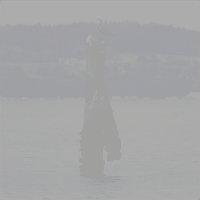

ModelB precition


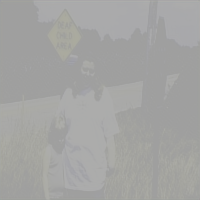

Input image


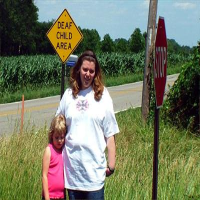

prediction stim


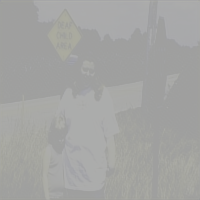

ModelB precition


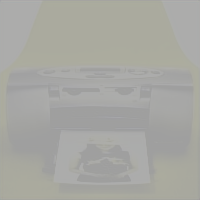

Input image


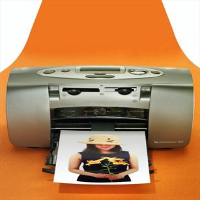

prediction stim


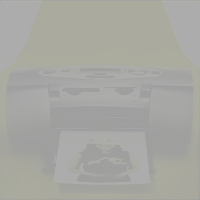

ModelB precition


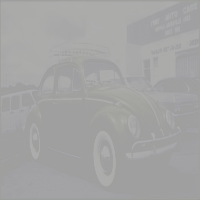

Input image


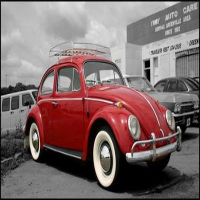

prediction stim


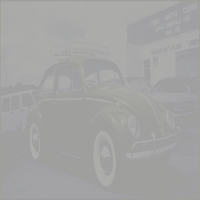

In [ ]:

for index in range(1, 40, 6):
  inImg = X[index]
  outImg = modelB.predict(np.array([inImg/255]))[0]*255
  outImg2 = modelA.predict(np.array([inImg/255]))[0]*255
  print("ModelB precition")
  cv2_imshow(np.uint8(outImg))
  print("Input image")
  cv2_imshow(np.uint8(inImg))
  print("prediction stim")
  cv2_imshow(np.uint8(CVD_Stim(outImg, 'Protanopia')))


In [ ]:
for layer in modelB.layers:
  print(layer.output)

Tensor("Input_4:0", shape=(None, 200, 200, 3), dtype=float32)
Tensor("conv2d_40/Relu:0", shape=(None, 200, 200, 32), dtype=float32)
Tensor("conv2d_41/Relu:0", shape=(None, 200, 200, 16), dtype=float32)
Tensor("conv2d_42/Relu:0", shape=(None, 200, 200, 8), dtype=float32)
Tensor("conv2d_43/Relu:0", shape=(None, 200, 200, 4), dtype=float32)
Tensor("conv2d_44/Sigmoid:0", shape=(None, 200, 200, 3), dtype=float32)
Tensor("conv2d_45_1/Relu:0", shape=(None, 200, 200, 32), dtype=float32)
Tensor("conv2d_46/Relu:0", shape=(None, 200, 200, 16), dtype=float32)
Tensor("conv2d_47/Relu:0", shape=(None, 200, 200, 8), dtype=float32)
Tensor("conv2d_48/Relu:0", shape=(None, 200, 200, 4), dtype=float32)
Tensor("conv2d_49/Sigmoid:0", shape=(None, 200, 200, 3), dtype=float32)


In [ ]:
#Neural_Style

# path = "/content/drive/My Drive/IP_IIITD/Neural_Style"
%cd "/content/drive/My Drive/IP_IIITD/Neural_Style"


/content/drive/My Drive/IP_IIITD/Neural_Style


In [ ]:
#  %rm *.jpg

rm: cannot remove '*.jpg': No such file or directory


In [ ]:
%tensorflow_version 1.x
import tensorflow
!pip install pillow
!pip install scipy==1.1.0

TensorFlow is already loaded. Please restart the runtime to change versions.
     |████████████████████████████████| 31.2MB 107kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:

# !python neural_style.py --help
!python neural_style.py --content 'examples/flower.jpg' --styles 'examples/flower_style.png' --output 'test.jpg' --overwrite



2020-11-29 10:42:55.327740: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-11-29 10:42:55.327987: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x32a5480 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-11-29 10:42:55.328021: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-11-29 10:42:55.329784: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-11-29 10:42:55.435334: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-29 10:42:55.436031: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6d4ce00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2020-11-29 10:42:

In [ ]:
# finding best  suited images for neural style transfer
arr = np.zeros(X.shape[0])
index = 0
for img in X:
  count = 0
  for x_cor in range(img.shape[0]):
    for y_cor in range(img.shape[1]):
      color = img[x_cor, y_cor].reshape(1, -1)
      if cluster1Map.get(tuple(color[0])) != None :
        count+=1
  arr[index] = count
  index+=1

In [ ]:
mean = np.mean(arr)
std = np.std(arr)

In [ ]:
X_relevant = []
index = 0
for img in X:
  if arr[index] > mean + std:
    X_relevant.append(img)
  index+=1

print(len(X_relevant))

346


In [ ]:
index = 1
for img in X_relevant:
  cv2.imwrite("/content/drive/My Drive/IP_IIITD/Neural_Style/Target_Images/" + str(index) +'.jpg', img)
  index+=1

# for index in range(10):
#   cv2_imshow(X_relevant[index])
#   cv2_imshow(np.uint8(CVD_Stim(X_relevant[index], 'Protanopia')))

In [ ]:
%tensorflow_version 1.x
import tensorflow
!pip install pillow
!pip install scipy==1.1.0

TensorFlow 1.x selected.


In [ ]:
import os

%cd "/content/drive/My Drive/IP_IIITD/Neural_Style"
!python neural_style.py --content 'examples/flower.jpg' --styles '/content/drive/My Drive/IP_IIITD/Neural_Style/Target_Images/5.jpg' --output '/content/drive/My Drive/IP_IIITD/Neural_Style/Recolored_Images/5.jpg' --overwrite
# index = 1

# dirPath = "/content/drive/My Drive/IP_IIITD/Neural_Style/Target_Images"
# dirPath2 = "/content/drive/My Drive/IP_IIITD/Neural_Style/Recolored_Images"
# count = 0
# for file in os.listdir(dirPath):
#     if file.endswith(".jpg"):
#       cur_File = str(index) +'.jpg'
#       command = 'python neural_style.py --content examples/flower.jpg --styles ' + dirPath + '/' + cur_File + ' --output ' + dirPath2 + '/' + cur_File + ' --overwrite'
#       print(command)
#       # os.system()
#       index+=1
#       print(index)


/content/drive/My Drive/IP_IIITD/Neural_Style


2020-12-01 14:16:14.157172: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-12-01 14:16:14.157512: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1ee1480 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-12-01 14:16:14.157551: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-12-01 14:16:14.159344: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-12-01 14:16:14.269366: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-01 14:16:14.270457: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5988e00 initialized for platform CUDA (this does not guarantee that